In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
sales_data = pd.read_csv(r"PS 5 SALES FROM PREORDERS.csv")
sales_data.head

<bound method NDFrame.head of      COUNTRY_ISO_CODE CALENDAR_DT  MONTH_ID  STD_ACCTS  DIG_ACCTS  STD_SALES  \
0                  US  2023-04-28    202304       9934       2950       9942   
1                  US  2021-09-05    202109       6601       1418       6602   
2                  US  2022-10-27    202210       8032       3335       8038   
3                  US  2021-01-23    202101       9329       2460       9332   
4                  US  2021-01-11    202101       5569       1778       5569   
...               ...         ...       ...        ...        ...        ...   
2207               GB  2021-07-28    202107       2278        728       2279   
2208               GB  2023-09-03    202309       2953        248       2954   
2209               US  2022-08-05    202208       6449       1099       6453   
2210               GB  2021-09-19    202109       1920        284       1922   
2211               GB  2022-01-19    202201       2409        165       2409   

      DIG

In [3]:
sales_data.shape

(2212, 9)

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COUNTRY_ISO_CODE  2212 non-null   object 
 1   CALENDAR_DT       2212 non-null   object 
 2   MONTH_ID          2212 non-null   int64  
 3   STD_ACCTS         2212 non-null   int64  
 4   DIG_ACCTS         2212 non-null   int64  
 5   STD_SALES         2212 non-null   int64  
 6   DIG_SALES         2212 non-null   int64  
 7   STD_REVENUE       2212 non-null   float64
 8   DIG_REVENUE       2212 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 155.7+ KB


In [5]:
sales_data['CALENDAR_DT']=pd.to_datetime(sales_data['CALENDAR_DT'])

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COUNTRY_ISO_CODE  2212 non-null   object        
 1   CALENDAR_DT       2212 non-null   datetime64[ns]
 2   MONTH_ID          2212 non-null   int64         
 3   STD_ACCTS         2212 non-null   int64         
 4   DIG_ACCTS         2212 non-null   int64         
 5   STD_SALES         2212 non-null   int64         
 6   DIG_SALES         2212 non-null   int64         
 7   STD_REVENUE       2212 non-null   float64       
 8   DIG_REVENUE       2212 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 155.7+ KB


In [7]:
sort = sales_data.sort_values('CALENDAR_DT', ascending=True)

In [8]:
sort

,COUNTRY_ISO_CODE,CALENDAR_DT,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE
1222,US,2020-09-17,202009,5,1,5,1,2439.98,384.00
888,US,2020-09-23,202009,1,1,1,1,480.00,384.00
564,US,2020-09-25,202009,5,1,5,1,2859.99,384.00
337,US,2020-10-09,202010,2,1,2,1,960.00,384.00
1067,US,2020-10-27,202010,18,1,18,1,9069.84,384.00
...,...,...,...,...,...,...,...,...,...
126,US,2023-11-13,202311,18757,325,18776,327,9440590.34,135325.53
2165,GB,2023-11-14,202311,2129,197,2130,197,1253689.91,92984.00
1421,US,2023-11-14,202311,13952,276,13972,277,7029106.16,114613.87
1730,US,2023-11-15,202311,6592,89,6593,89,3303175.21,36215.22


In [9]:
US_Sales = sales_data[(sales_data['COUNTRY_ISO_CODE']=='US') & (sales_data['CALENDAR_DT']>='2022-01-01') & (sales_data['CALENDAR_DT']<'2023-01-01')].sort_values(by=['CALENDAR_DT'])

In [10]:
US_Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 270 to 600
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COUNTRY_ISO_CODE  365 non-null    object        
 1   CALENDAR_DT       365 non-null    datetime64[ns]
 2   MONTH_ID          365 non-null    int64         
 3   STD_ACCTS         365 non-null    int64         
 4   DIG_ACCTS         365 non-null    int64         
 5   STD_SALES         365 non-null    int64         
 6   DIG_SALES         365 non-null    int64         
 7   STD_REVENUE       365 non-null    float64       
 8   DIG_REVENUE       365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 28.5+ KB


In [11]:
US_Sales

,COUNTRY_ISO_CODE,CALENDAR_DT,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE
270,US,2022-01-01,202201,16454,1499,16457,1499,8260010.11,604969.88
1346,US,2022-01-02,202201,14121,1447,14122,1447,7088542.87,582642.20
1200,US,2022-01-03,202201,12110,1529,12118,1529,6085542.65,615049.35
1263,US,2022-01-04,202201,11433,1495,11436,1497,5747289.64,602337.67
566,US,2022-01-05,202201,11369,1417,11375,1422,5719220.74,573346.56
...,...,...,...,...,...,...,...,...,...
99,US,2022-12-27,202212,74667,12928,74703,12933,37408363.22,5181496.28
661,US,2022-12-28,202212,48998,7854,49013,7861,24565740.27,3153739.04
140,US,2022-12-29,202212,42084,7007,42097,7014,21114959.98,2815595.60
1260,US,2022-12-30,202212,37101,6751,37115,6752,18617959.25,2708221.96


In [12]:
#US_Sales.set_index('CALENDAR_DT',inplace=True)
US_Sales.head()

,COUNTRY_ISO_CODE,CALENDAR_DT,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE
270,US,2022-01-01,202201,16454,1499,16457,1499,8260010.11,604969.88
1346,US,2022-01-02,202201,14121,1447,14122,1447,7088542.87,582642.20
1200,US,2022-01-03,202201,12110,1529,12118,1529,6085542.65,615049.35
1263,US,2022-01-04,202201,11433,1495,11436,1497,5747289.64,602337.67
566,US,2022-01-05,202201,11369,1417,11375,1422,5719220.74,573346.56


In [13]:
US_Sales.set_index('CALENDAR_DT', inplace=True)
weekly_data_US = US_Sales[US_Sales['COUNTRY_ISO_CODE'] == 'US'].resample('W-Sun').sum()

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\2736406650.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data_US = US_Sales[US_Sales['COUNTRY_ISO_CODE'] == 'US'].resample('W-Sun').sum()


In [14]:
weekly_data_US['TOTAL_SALES'] = weekly_data_US['STD_SALES']	+ weekly_data_US['DIG_SALES']

In [15]:
weekly_data_US.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2022-01-02 to 2023-01-01
Freq: W-SUN
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONTH_ID     53 non-null     int64  
 1   STD_ACCTS    53 non-null     int64  
 2   DIG_ACCTS    53 non-null     int64  
 3   STD_SALES    53 non-null     int64  
 4   DIG_SALES    53 non-null     int64  
 5   STD_REVENUE  53 non-null     float64
 6   DIG_REVENUE  53 non-null     float64
 7   TOTAL_SALES  53 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.7 KB


In [16]:
weekly_data_US

,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE,TOTAL_SALES
CALENDAR_DT,,,,,,,,
2022-01-02,404402,30575,2946,30579,2946,1.534855e+07,1187612.08,33525
2022-01-09,1415407,117798,9913,117827,9924,5.911107e+07,3997225.49,127751
2022-01-16,1415407,85587,8880,85608,8890,4.298786e+07,3579803.20,94498
2022-01-23,1415407,76384,10190,76414,10207,3.838841e+07,4102789.71,86621
2022-01-30,1415407,83414,9303,83445,9325,4.194873e+07,3752070.72,92770
2022-02-06,1415413,43455,6165,43485,6191,2.197181e+07,2495813.54,49676
2022-02-13,1415414,38987,6184,39029,6210,1.975639e+07,2502869.14,45239
2022-02-20,1415414,37058,6743,37089,6762,1.879905e+07,2725368.15,43851
2022-02-27,1415414,48620,10761,48665,10774,2.462543e+07,4338361.54,59439


In [17]:
weekly_data_US

,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE,TOTAL_SALES
CALENDAR_DT,,,,,,,,
2022-01-02,404402,30575,2946,30579,2946,1.534855e+07,1187612.08,33525
2022-01-09,1415407,117798,9913,117827,9924,5.911107e+07,3997225.49,127751
2022-01-16,1415407,85587,8880,85608,8890,4.298786e+07,3579803.20,94498
2022-01-23,1415407,76384,10190,76414,10207,3.838841e+07,4102789.71,86621
2022-01-30,1415407,83414,9303,83445,9325,4.194873e+07,3752070.72,92770
2022-02-06,1415413,43455,6165,43485,6191,2.197181e+07,2495813.54,49676
2022-02-13,1415414,38987,6184,39029,6210,1.975639e+07,2502869.14,45239
2022-02-20,1415414,37058,6743,37089,6762,1.879905e+07,2725368.15,43851
2022-02-27,1415414,48620,10761,48665,10774,2.462543e+07,4338361.54,59439


In [18]:
weekly_data_US = weekly_data_US.drop(weekly_data_US.index[-1])

In [19]:
weekly_data_US

,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE,TOTAL_SALES
CALENDAR_DT,,,,,,,,
2022-01-02,404402,30575,2946,30579,2946,1.534855e+07,1187612.08,33525
2022-01-09,1415407,117798,9913,117827,9924,5.911107e+07,3997225.49,127751
2022-01-16,1415407,85587,8880,85608,8890,4.298786e+07,3579803.20,94498
2022-01-23,1415407,76384,10190,76414,10207,3.838841e+07,4102789.71,86621
2022-01-30,1415407,83414,9303,83445,9325,4.194873e+07,3752070.72,92770
2022-02-06,1415413,43455,6165,43485,6191,2.197181e+07,2495813.54,49676
2022-02-13,1415414,38987,6184,39029,6210,1.975639e+07,2502869.14,45239
2022-02-20,1415414,37058,6743,37089,6762,1.879905e+07,2725368.15,43851
2022-02-27,1415414,48620,10761,48665,10774,2.462543e+07,4338361.54,59439


In [20]:
trends_US=pd.read_csv('multiTimeline (1).csv')

In [21]:
trends_US

,Week,Demons Souls: (United States)
0,02-01-2022,98
1,09-01-2022,88
2,16-01-2022,100
3,23-01-2022,91
4,30-01-2022,78
5,06-02-2022,60
6,13-02-2022,54
7,20-02-2022,70
8,27-02-2022,49
9,06-03-2022,53


In [22]:
trends_US['CALENDAR_DT']=pd.to_datetime(trends_US['Week'])

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\2295327779.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  trends_US['CALENDAR_DT']=pd.to_datetime(trends_US['Week'])


In [23]:
trends_US

,Week,Demons Souls: (United States),CALENDAR_DT
0,02-01-2022,98,2022-02-01
1,09-01-2022,88,2022-09-01
2,16-01-2022,100,2022-01-16
3,23-01-2022,91,2022-01-23
4,30-01-2022,78,2022-01-30
5,06-02-2022,60,2022-06-02
6,13-02-2022,54,2022-02-13
7,20-02-2022,70,2022-02-20
8,27-02-2022,49,2022-02-27
9,06-03-2022,53,2022-06-03


In [24]:
weekly_data_US.reset_index(inplace=True)

In [25]:
weekly_data_US.head(
)

,CALENDAR_DT,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE,TOTAL_SALES
0,2022-01-02,404402,30575,2946,30579,2946,15348552.98,1187612.08,33525
1,2022-01-09,1415407,117798,9913,117827,9924,59111070.41,3997225.49,127751
2,2022-01-16,1415407,85587,8880,85608,8890,42987859.99,3579803.20,94498
3,2022-01-23,1415407,76384,10190,76414,10207,38388405.35,4102789.71,86621
4,2022-01-30,1415407,83414,9303,83445,9325,41948729.05,3752070.72,92770


In [26]:
merged_data=pd.merge(weekly_data_US,trends_US,on='CALENDAR_DT',how='inner')

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CALENDAR_DT                    32 non-null     datetime64[ns]
 1   MONTH_ID                       32 non-null     int64         
 2   STD_ACCTS                      32 non-null     int64         
 3   DIG_ACCTS                      32 non-null     int64         
 4   STD_SALES                      32 non-null     int64         
 5   DIG_SALES                      32 non-null     int64         
 6   STD_REVENUE                    32 non-null     float64       
 7   DIG_REVENUE                    32 non-null     float64       
 8   TOTAL_SALES                    32 non-null     int64         
 9   Week                           32 non-null     object        
 10  Demons Souls: (United States)  32 non-null     int64         
dtypes: datetime64[ns](1),

In [28]:
merged_data.drop(merged_data.columns[[9]],axis=1,inplace=True)

In [29]:
merged_data

,CALENDAR_DT,MONTH_ID,STD_ACCTS,DIG_ACCTS,STD_SALES,DIG_SALES,STD_REVENUE,DIG_REVENUE,TOTAL_SALES,Demons Souls: (United States)
0,2022-01-16,1415407,85587,8880,85608,8890,4.298786e+07,3579803.20,94498,100
1,2022-01-23,1415407,76384,10190,76414,10207,3.838841e+07,4102789.71,86621,91
2,2022-01-30,1415407,83414,9303,83445,9325,4.194873e+07,3752070.72,92770,78
3,2022-02-13,1415414,38987,6184,39029,6210,1.975639e+07,2502869.14,45239,54
4,2022-02-20,1415414,37058,6743,37089,6762,1.879905e+07,2725368.15,43851,70
5,2022-02-27,1415414,48620,10761,48665,10774,2.462543e+07,4338361.54,59439,49
6,2022-03-13,1415421,50052,13220,50087,13233,2.534443e+07,5314688.20,63320,44
7,2022-03-20,1415421,36848,9347,36899,9371,1.879276e+07,3776655.51,46270,53
8,2022-03-27,1415421,54321,7806,54367,7824,2.747459e+07,3150541.95,62191,46
9,2022-04-17,1415428,32954,6369,33016,6393,1.677815e+07,2576203.61,39409,44


In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CALENDAR_DT                    32 non-null     datetime64[ns]
 1   MONTH_ID                       32 non-null     int64         
 2   STD_ACCTS                      32 non-null     int64         
 3   DIG_ACCTS                      32 non-null     int64         
 4   STD_SALES                      32 non-null     int64         
 5   DIG_SALES                      32 non-null     int64         
 6   STD_REVENUE                    32 non-null     float64       
 7   DIG_REVENUE                    32 non-null     float64       
 8   TOTAL_SALES                    32 non-null     int64         
 9   Demons Souls: (United States)  32 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 2.8 KB


In [31]:
correlation = merged_data['TOTAL_SALES'].corr(merged_data['Demons Souls: (United States)'])

In [32]:
correlation

0.3129185022038819

In [33]:
playstation_5_buy_online=pd.read_csv('playstation 5 buy online.csv')
ps5_buy_online=pd.read_csv("ps5 buy online.csv")
Destruction_AllStars=pd.read_csv("Destruction AllStars.csv")
Forspoken=pd.read_csv('Forspoken.csv')
Ratchet_and_Clank_Rift_Apart=pd.read_csv("Ratchet & Clank Rift Apart.csv")
Returnal=pd.read_csv('Returnal.csv')
sony_ps5_buy_online=pd.read_csv('sony ps5 buy online.csv')

In [34]:
playstation_5_buy_online['CALENDAR_DT'] = pd.to_datetime(playstation_5_buy_online['Week'])

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\1862347898.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  playstation_5_buy_online['CALENDAR_DT'] = pd.to_datetime(playstation_5_buy_online['Week'])


In [35]:
ps5_buy_online['CALENDAR_DT'] = pd.to_datetime(ps5_buy_online['Week'])
Destruction_AllStars['CALENDAR_DT'] = pd.to_datetime(Destruction_AllStars['Week'])
Forspoken['CALENDAR_DT'] = pd.to_datetime(Forspoken['Week'])
Ratchet_and_Clank_Rift_Apart['CALENDAR_DT'] = pd.to_datetime(Ratchet_and_Clank_Rift_Apart['Week'])
Returnal['CALENDAR_DT'] = pd.to_datetime(Returnal['Week'])
sony_ps5_buy_online['CALENDAR_DT'] = pd.to_datetime(sony_ps5_buy_online['Week'])

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\1495317995.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ps5_buy_online['CALENDAR_DT'] = pd.to_datetime(ps5_buy_online['Week'])
C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\1495317995.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Destruction_AllStars['CALENDAR_DT'] = pd.to_datetime(Destruction_AllStars['Week'])
C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\1495317995.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Forspoken['CALENDAR_DT'] = pd.to_datetime(Forspoken['Week'])
C:\Users

In [36]:
merged_data=pd.merge(merged_data,playstation_5_buy_online,on='CALENDAR_DT',how='inner')

In [37]:
merged_data=pd.merge(merged_data,ps5_buy_online,on='CALENDAR_DT',how='inner')

In [38]:
merged_data=pd.merge(merged_data,sony_ps5_buy_online,on='CALENDAR_DT',how='inner')

In [39]:
merged_data=pd.merge(merged_data,Destruction_AllStars,on='CALENDAR_DT',how='inner')

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\4287208898.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Week_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data=pd.merge(merged_data,Destruction_AllStars,on='CALENDAR_DT',how='inner')


In [40]:
merged_data=pd.merge(merged_data,Returnal,on='CALENDAR_DT',how='inner')

In [41]:
merged_data=pd.merge(merged_data,Ratchet_and_Clank_Rift_Apart,on='CALENDAR_DT',how='inner')

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\2416740307.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Week_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_data=pd.merge(merged_data,Ratchet_and_Clank_Rift_Apart,on='CALENDAR_DT',how='inner')


In [42]:
merged_data=pd.merge(merged_data,Forspoken,on='CALENDAR_DT',how='inner')

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   CALENDAR_DT                                   32 non-null     datetime64[ns]
 1   MONTH_ID                                      32 non-null     int64         
 2   STD_ACCTS                                     32 non-null     int64         
 3   DIG_ACCTS                                     32 non-null     int64         
 4   STD_SALES                                     32 non-null     int64         
 5   DIG_SALES                                     32 non-null     int64         
 6   STD_REVENUE                                   32 non-null     float64       
 7   DIG_REVENUE                                   32 non-null     float64       
 8   TOTAL_SALES                                   32 non-null     int64     

In [44]:
merged_data.drop(merged_data.columns[[1,2,3,6,7,10,12,14,16,18,20,22]],axis=1,inplace=True)

In [45]:
merged_data

,CALENDAR_DT,STD_SALES,DIG_SALES,TOTAL_SALES,Demons Souls: (United States),playstation 5 buy online: (United States),ps5 buy online: (United States),sony ps5 buy online: (United States),Destruction AllStars: (United States),Returnal: (United States),Ratchet & Clank: Rift Apart: (United States),Forspoken: (United States)
0,2022-01-16,85608,8890,94498,100,0,51,46,71,87,65,12
1,2022-01-23,76414,10207,86621,91,0,45,0,70,71,58,10
2,2022-01-30,83445,9325,92770,78,19,30,0,50,63,56,10
3,2022-02-13,39029,6210,45239,54,0,43,0,56,61,51,11
4,2022-02-20,37089,6762,43851,70,45,42,0,47,42,45,12
5,2022-02-27,48665,10774,59439,49,31,34,19,40,34,34,12
6,2022-03-13,50087,13233,63320,44,0,57,0,52,46,33,25
7,2022-03-20,36899,9371,46270,53,0,25,0,39,77,34,17
8,2022-03-27,54367,7824,62191,46,42,27,18,17,62,36,18
9,2022-04-17,33016,6393,39409,44,44,41,25,15,42,36,12


In [46]:
merged_data.corr().to_csv('correlation_matrix.csv')

C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\2600603928.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr().to_csv('correlation_matrix.csv')


C:\Users\kumar\AppData\Local\Temp\ipykernel_26056\1084348235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


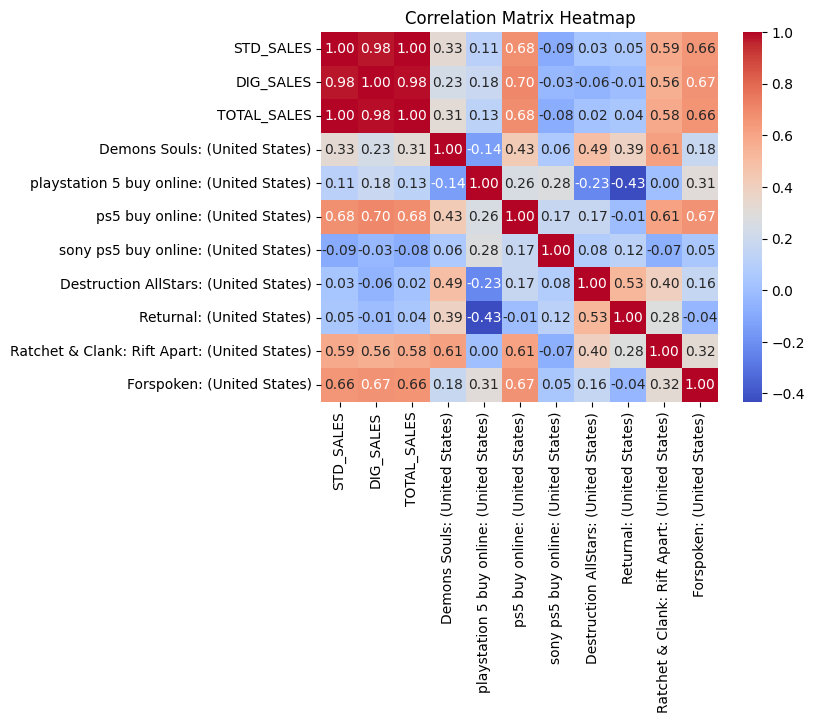

In [47]:
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

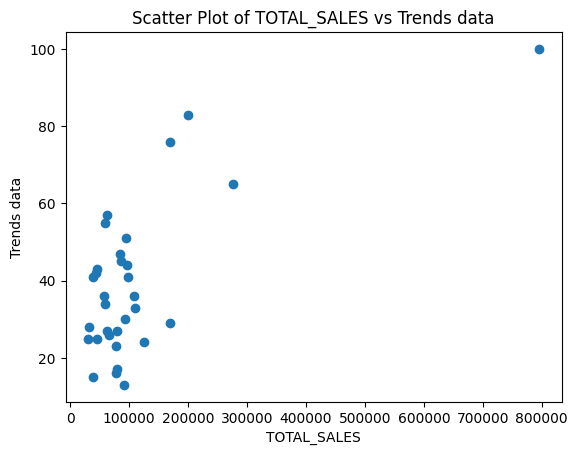

In [48]:
plt.scatter(merged_data['TOTAL_SALES'], merged_data['ps5 buy online: (United States)'])
plt.title('Scatter Plot of TOTAL_SALES vs Trends data')
plt.xlabel('TOTAL_SALES')
plt.ylabel('Trends data')
plt.show()

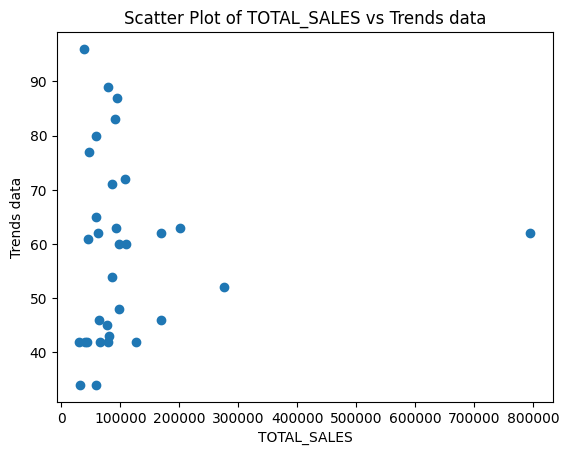

In [49]:
plt.scatter(merged_data['TOTAL_SALES'], merged_data['Returnal: (United States)'])
plt.title('Scatter Plot of TOTAL_SALES vs Trends data')
plt.xlabel('TOTAL_SALES')
plt.ylabel('Trends data')
plt.show()

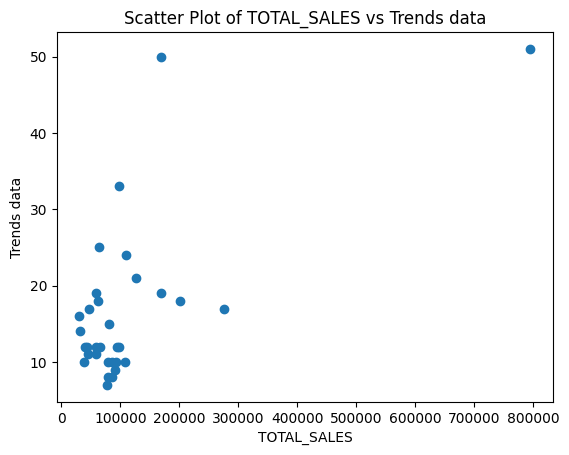

In [50]:
plt.scatter(merged_data['TOTAL_SALES'], merged_data['Forspoken: (United States)'])
plt.title('Scatter Plot of TOTAL_SALES vs Trends data')
plt.xlabel('TOTAL_SALES')
plt.ylabel('Trends data')
plt.show()

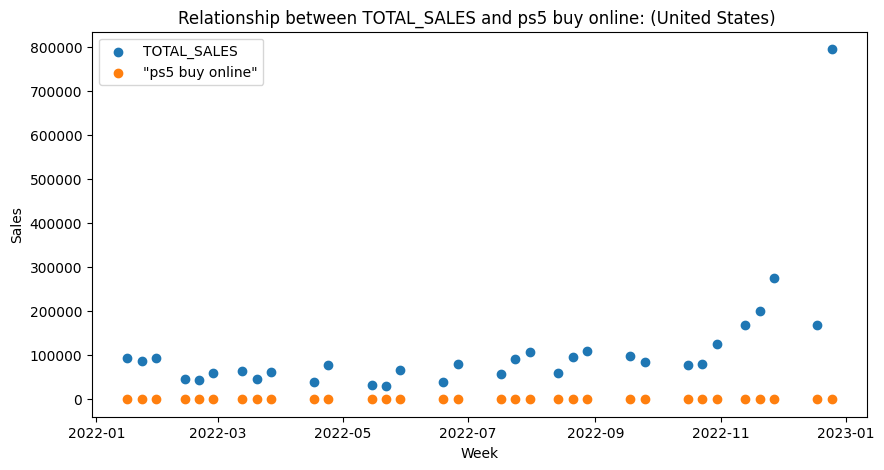

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES'], label='TOTAL_SALES')
plt.scatter(merged_data['CALENDAR_DT'], merged_data['ps5 buy online: (United States)'], label='"ps5 buy online"')

plt.title('Relationship between TOTAL_SALES and ps5 buy online: (United States) ')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [52]:
correlation1 = merged_data['TOTAL_SALES'].corr(merged_data['Demons Souls: (United States)'])
correlation2 = merged_data['TOTAL_SALES'].corr(merged_data['Forspoken: (United States)'])
correlation3 = merged_data['TOTAL_SALES'].corr(merged_data['Returnal: (United States)'])
correlation4 = merged_data['TOTAL_SALES'].corr(merged_data['Ratchet & Clank: Rift Apart: (United States)'])
correlation5 = merged_data['TOTAL_SALES'].corr(merged_data['playstation 5 buy online: (United States)'])
correlation6 = merged_data['TOTAL_SALES'].corr(merged_data['ps5 buy online: (United States)'])
correlation7 = merged_data['TOTAL_SALES'].corr(merged_data['sony ps5 buy online: (United States)'])

In [53]:
print(correlation1)
print(correlation2)
print(correlation3)
print(correlation4)
print(correlation5)
print(correlation6)
print(correlation7)

0.3129185022038819
0.6593204441396782
0.03932042990641474
0.5833689403675923
0.12526291819743363
0.6820914017202434
-0.08326544786582918


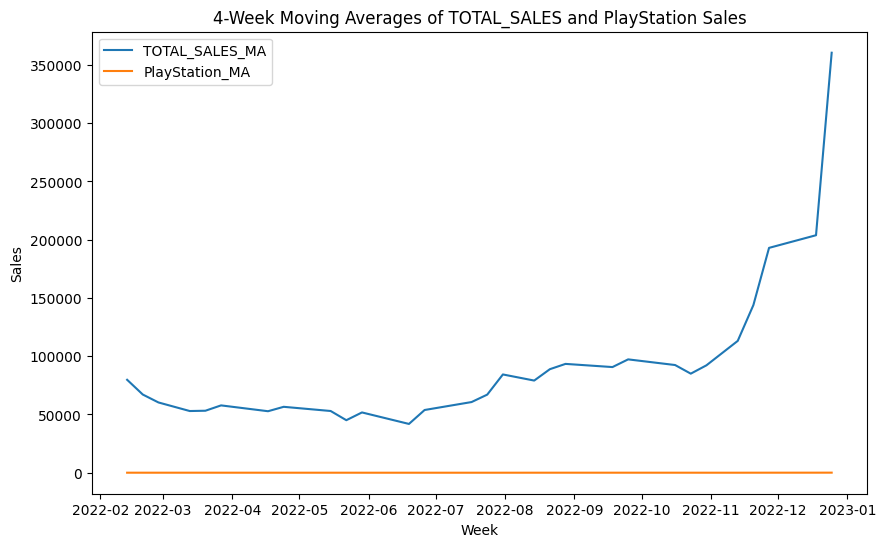

Lag Correlation (1 week): 0.7432539155175764


In [54]:
merged_data['TOTAL_SALES_MA'] =merged_data['TOTAL_SALES'].rolling(window=4).mean()
merged_data['PlayStation_MA'] =merged_data['ps5 buy online: (United States)'].rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['PlayStation_MA'], label='PlayStation_MA')
plt.title('4-Week Moving Averages of TOTAL_SALES and PlayStation Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

#lag 1 to see if there is any impact after 1 week of search
lag_correlation =merged_data['TOTAL_SALES'].corr(merged_data['ps5 buy online: (United States)'].shift(-1))
print(f"Lag Correlation (1 week): {lag_correlation}")

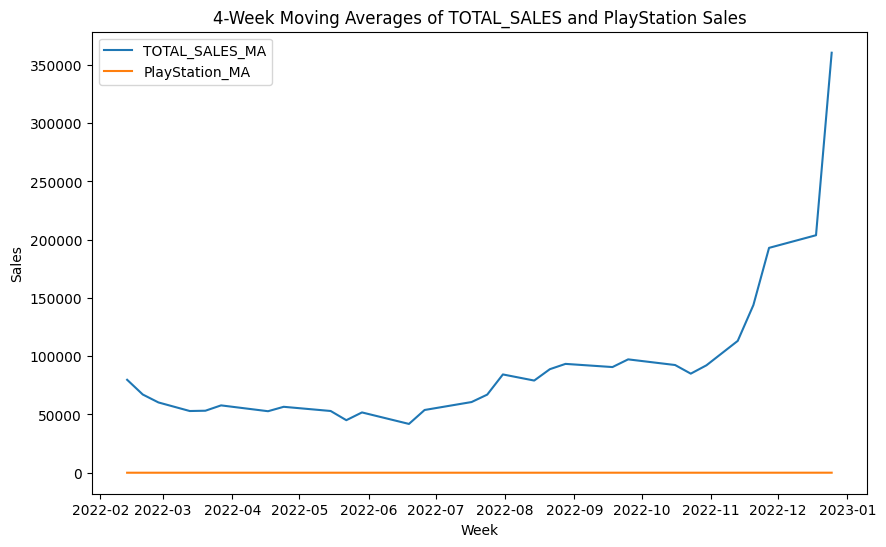

Lag Correlation (1 week): 0.6094358508342899


In [55]:
merged_data['TOTAL_SALES_MA'] =merged_data['TOTAL_SALES'].rolling(window=4).mean()
merged_data['PlayStation_MA'] =merged_data['Forspoken: (United States)'].rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['PlayStation_MA'], label='PlayStation_MA')
plt.title('4-Week Moving Averages of TOTAL_SALES and PlayStation Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

#lag 1 to see if there is any impact after 1 week of search
lag_correlation =merged_data['TOTAL_SALES'].corr(merged_data['Forspoken: (United States)'].shift(-1))
print(f"Lag Correlation (1 week): {lag_correlation}")

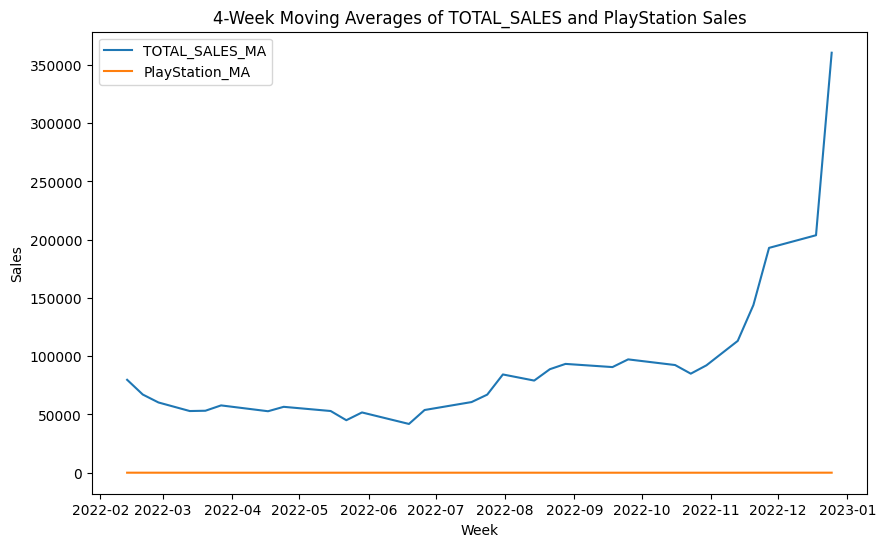

Lag Correlation (1 week): 0.5328611359741611


In [56]:
merged_data['TOTAL_SALES_MA'] =merged_data['TOTAL_SALES'].rolling(window=4).mean()
merged_data['PlayStation_MA'] =merged_data['Ratchet & Clank: Rift Apart: (United States)'].rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['PlayStation_MA'], label='PlayStation_MA')
plt.title('4-Week Moving Averages of TOTAL_SALES and PlayStation Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

#lag 1 to see if there is any impact after 1 week of search
lag_correlation =merged_data['TOTAL_SALES'].corr(merged_data['Ratchet & Clank: Rift Apart: (United States)'].shift(-1))
print(f"Lag Correlation (1 week): {lag_correlation}")

In [57]:
new_min = 0
new_max = 100

min_value = merged_data['TOTAL_SALES'].min()
max_value = merged_data['TOTAL_SALES'].max()

merged_data['TOTAL_SALES_SCALED'] = ((merged_data['TOTAL_SALES'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min


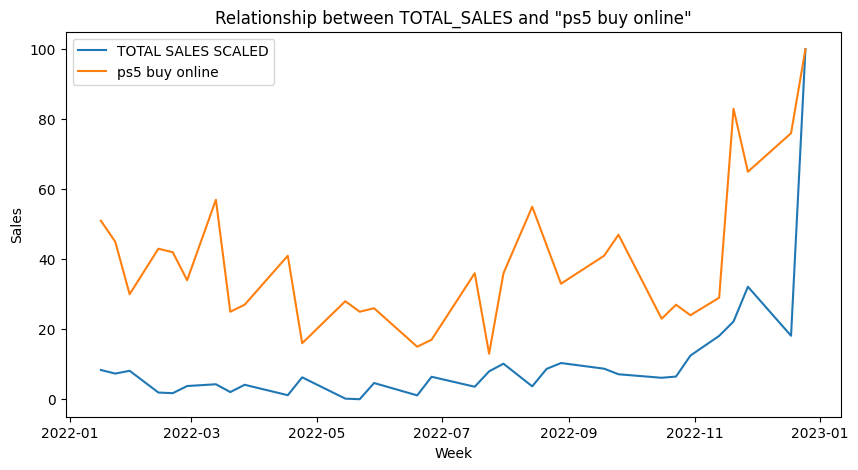

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'], label='TOTAL SALES SCALED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['ps5 buy online: (United States)'], label='ps5 buy online')
plt.title('Relationship between TOTAL_SALES and "ps5 buy online"')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

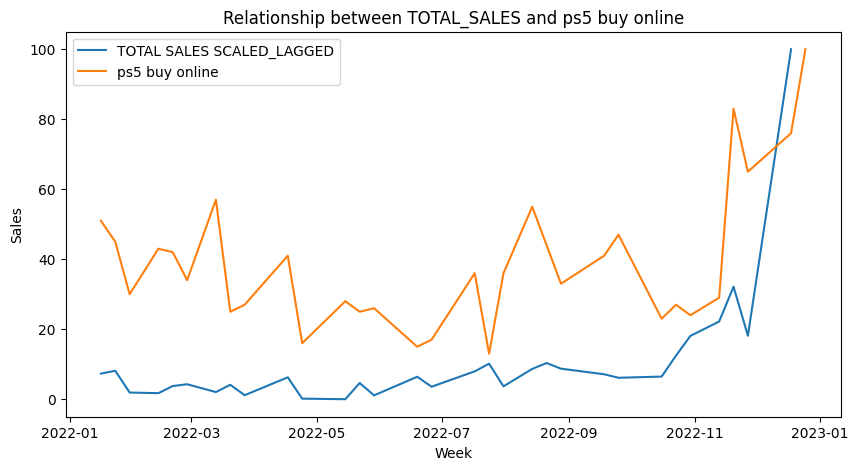

In [59]:
# lag comparison
lag_value = -1
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'].shift(lag_value), label='TOTAL SALES SCALED_LAGGED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['ps5 buy online: (United States)'], label='ps5 buy online')
plt.title('Relationship between TOTAL_SALES and ps5 buy online')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

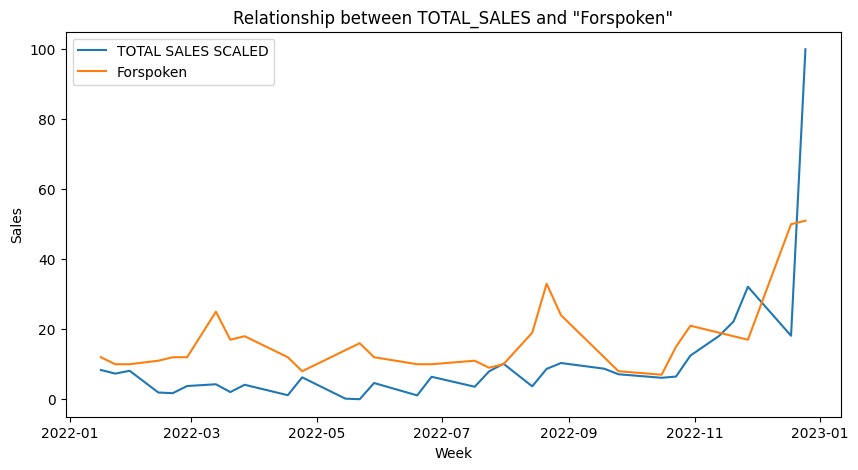

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'], label='TOTAL SALES SCALED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['Forspoken: (United States)'], label='Forspoken')
plt.title('Relationship between TOTAL_SALES and "Forspoken"')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

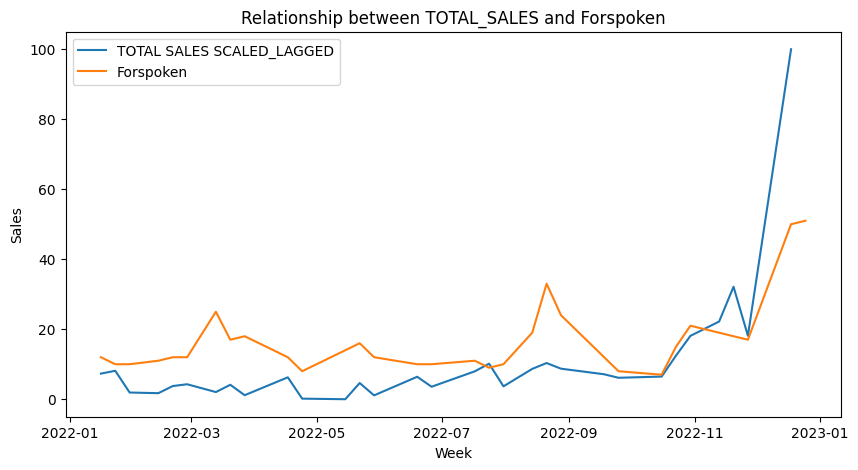

In [61]:
# lag comparison
lag_value = -1
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'].shift(lag_value), label='TOTAL SALES SCALED_LAGGED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['Forspoken: (United States)'],label='Forspoken')
plt.title('Relationship between TOTAL_SALES and Forspoken')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

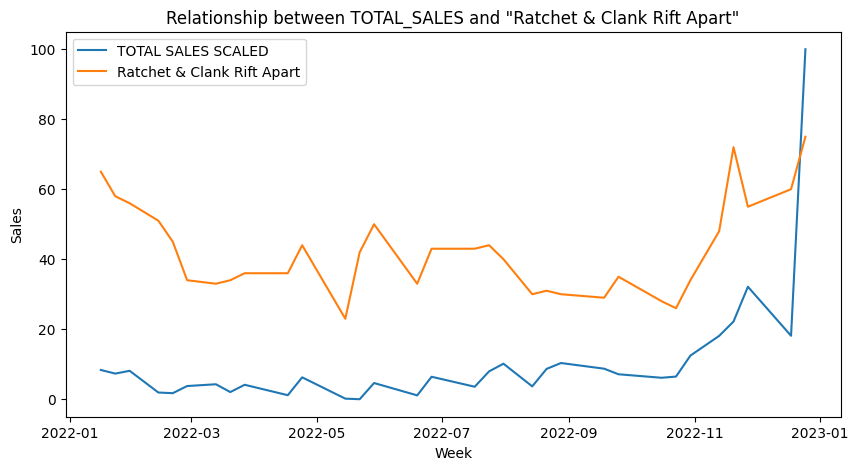

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'], label='TOTAL SALES SCALED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['Ratchet & Clank: Rift Apart: (United States)'], label='Ratchet & Clank Rift Apart')
plt.title('Relationship between TOTAL_SALES and "Ratchet & Clank Rift Apart"')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

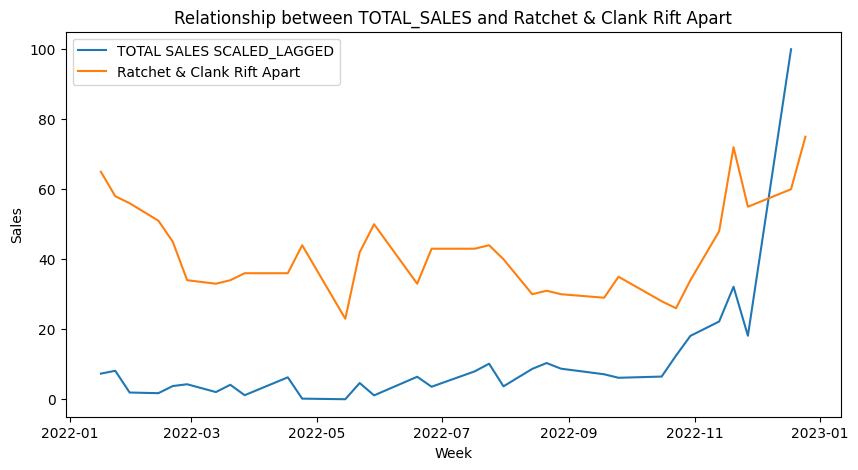

In [63]:
# lag comparison
lag_value = -1
plt.figure(figsize=(10, 5))
plt.plot(merged_data['CALENDAR_DT'], merged_data['TOTAL_SALES_SCALED'].shift(lag_value), label='TOTAL SALES SCALED_LAGGED')
plt.plot(merged_data['CALENDAR_DT'], merged_data['Ratchet & Clank: Rift Apart: (United States)'], label='Ratchet & Clank Rift Apart')
plt.title('Relationship between TOTAL_SALES and Ratchet & Clank Rift Apart')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

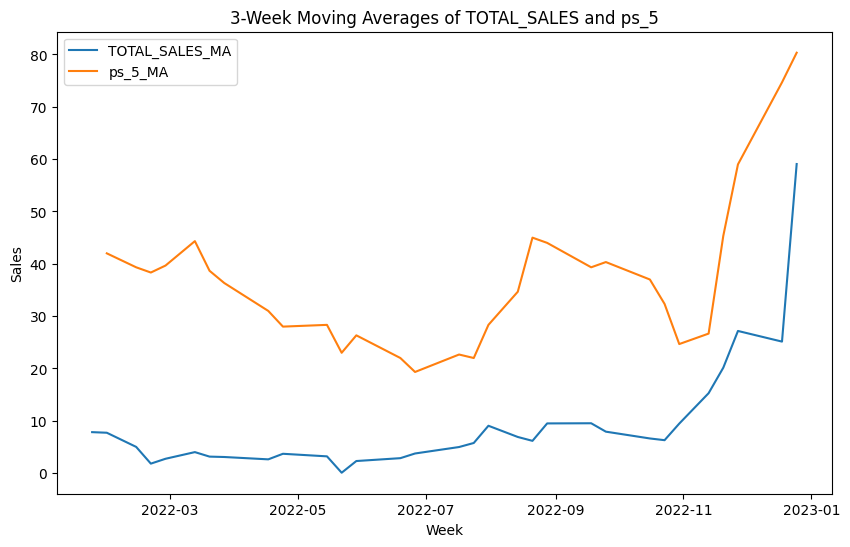

Lagged Correlations:
Lag 1 week(s): 0.7432539155175766
Lag 2 week(s): 0.7805002888489703
Lag 3 week(s): 0.698968316341625
Lag 4 week(s): 0.5646269030848029
Lag 5 week(s): 0.425716458357243


In [64]:
#2 week moving averages
merged_data['TOTAL_SALES_MA'] =merged_data['TOTAL_SALES_SCALED'].rolling(window=2).mean()
merged_data['ps_5_MA'] =merged_data['ps5 buy online: (United States)'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['ps_5_MA'], label='ps_5_MA')
plt.title('3-Week Moving Averages of TOTAL_SALES and ps_5')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Lagged correlation analysis to see if there is any impact after 1 week of search
lagged_correlations = [merged_data['TOTAL_SALES_SCALED'].corr(merged_data['ps5 buy online: (United States)'].shift(-i)) for i in range(1, 6)]
print("Lagged Correlations:")
for i, correlation in enumerate(lagged_correlations, start=1):
    print(f"Lag {i} week(s): {correlation}")

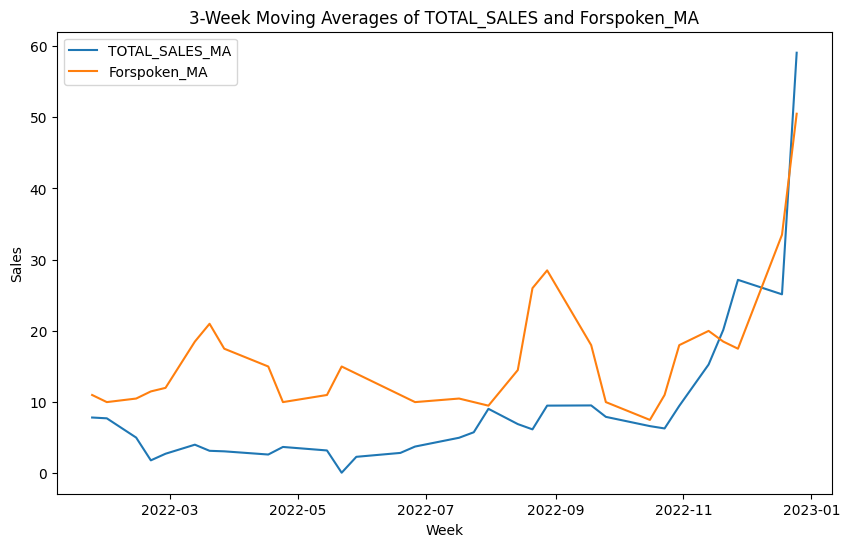

Lagged Correlations:
Lag 1 week(s): 0.6094358508342901
Lag 2 week(s): 0.7170026620212984
Lag 3 week(s): 0.6926932863787443
Lag 4 week(s): 0.6258480645301664
Lag 5 week(s): 0.40938140146309376


In [65]:
#2 week moving averages
merged_data['Forspoken_MA'] =merged_data['Forspoken: (United States)'].rolling(window=2).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['Forspoken_MA'], label='Forspoken_MA')
plt.title('3-Week Moving Averages of TOTAL_SALES and Forspoken_MA')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Lagged correlation analysis to see if there is any impact after 1 week of search
lagged_correlations = [merged_data['TOTAL_SALES_SCALED'].corr(merged_data['Forspoken: (United States)'].shift(-i)) for i in range(1, 6)]
print("Lagged Correlations:")
for i, correlation in enumerate(lagged_correlations, start=1):
    print(f"Lag {i} week(s): {correlation}")

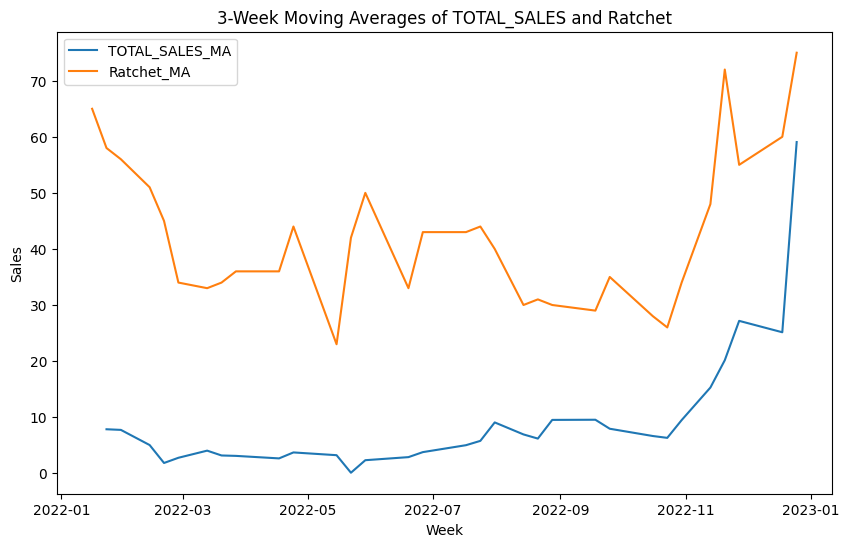

Lagged Correlations:
Lag 1 week(s): 0.5328611359741611
Lag 2 week(s): 0.6501848481731122
Lag 3 week(s): 0.49848782209855524
Lag 4 week(s): 0.3087793795431505
Lag 5 week(s): 0.24326699868775412


In [66]:
#2 week moving averages

merged_data['Ratchet_MA'] =merged_data['Ratchet & Clank: Rift Apart: (United States)'].rolling(window=2).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_data['CALENDAR_DT'],merged_data['TOTAL_SALES_MA'], label='TOTAL_SALES_MA')
plt.plot(merged_data['CALENDAR_DT'],merged_data['Ratchet & Clank: Rift Apart: (United States)'], label='Ratchet_MA')
plt.title('3-Week Moving Averages of TOTAL_SALES and Ratchet')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Lagged correlation analysis to see if there is any impact after 1 week of search
lagged_correlations = [merged_data['TOTAL_SALES_SCALED'].corr(merged_data['Ratchet & Clank: Rift Apart: (United States)'].shift(-i)) for i in range(1, 6)]
print("Lagged Correlations:")
for i, correlation in enumerate(lagged_correlations, start=1):
    print(f"Lag {i} week(s): {correlation}")

In [68]:
merged_data.to_csv('merged_data')